# Work Flow
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

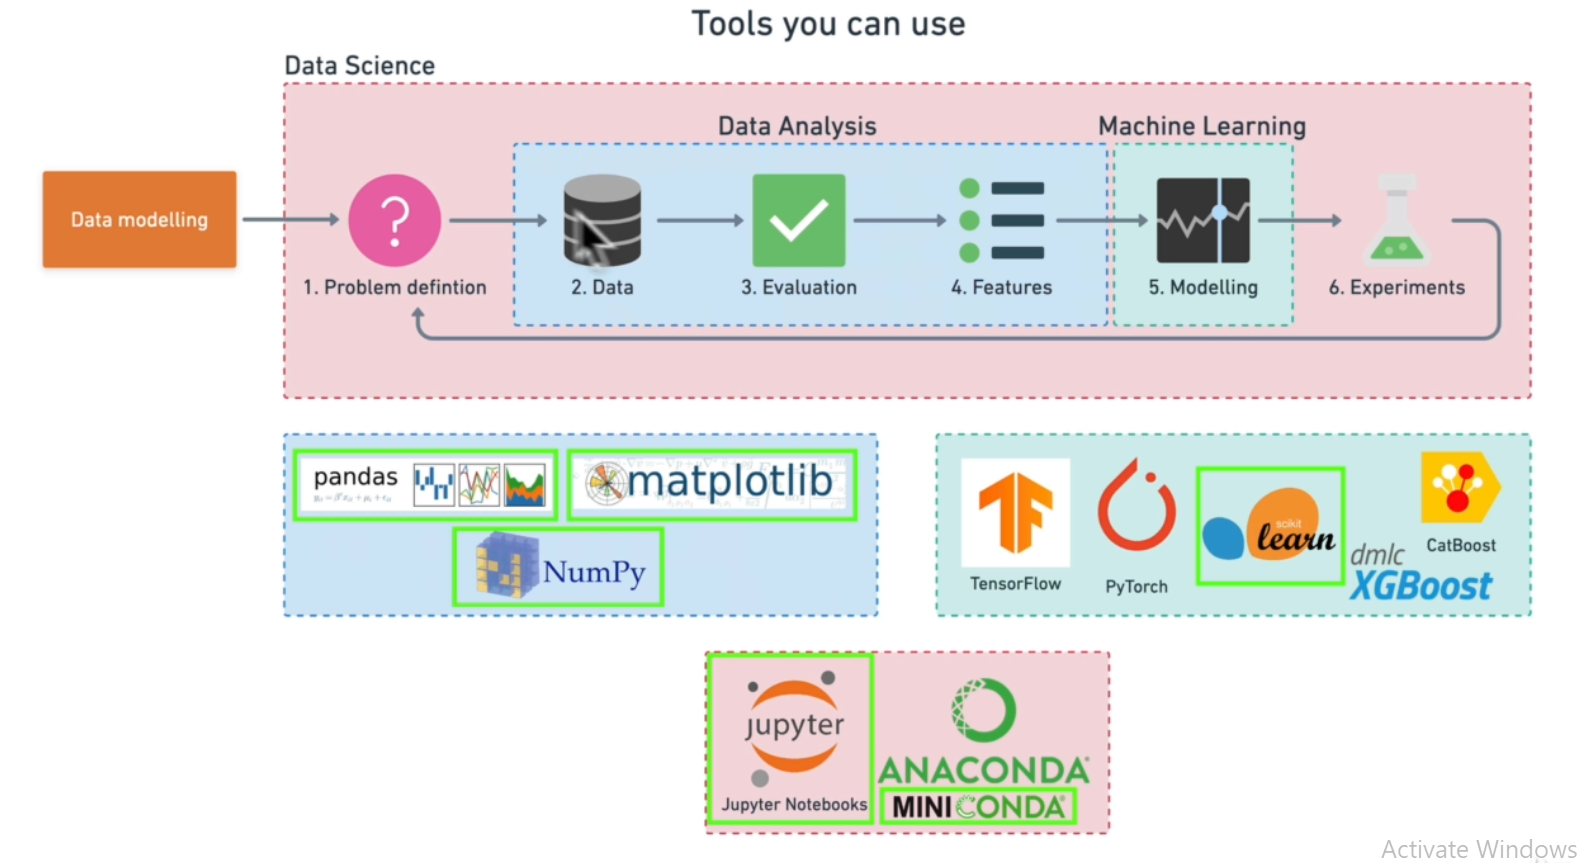

# 1. Problem Definition 

> What sorts of people are more likely to survive?

survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# 3. Evaluation

**95% Accuracy** of predicting survavibility


# 4. Features

- pclass
- Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- Sex
- Age
- Ticket number
- Passenger fare	
- Cabin number	
- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Preparations

In [1]:

# EDA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [8]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.shape

(891, 12)

In [10]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

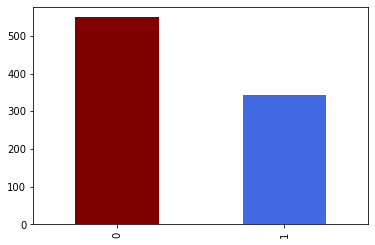

In [11]:
df.Survived.value_counts().plot(kind='bar', color = ['maroon', 'royalblue'])

In [12]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [13]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [15]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [17]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df = df.drop('Cabin', axis=1)

In [19]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [20]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mean())

TypeError: can only concatenate str (not "int") to str

In [21]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'], dtype=object)

In [22]:
df = df.drop('Name', axis=1)
df = df.drop('SibSp', axis=1)
df = df.drop('Parch', axis=1)
df = df.drop('Ticket', axis=1)

In [23]:
df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
Fare,7.25,71.2833,7.925,53.1,8.05
Embarked,S,C,S,S,S


In [24]:
df['Embarked'] = df.Embarked.astype('category')

In [25]:
df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
Fare,7.25,71.2833,7.925,53.1,8.05
Embarked,S,C,S,S,S


In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mean())

In [26]:
df['Embarked'] = df['Embarked'].apply(lambda x: x.cat.codes)

AttributeError: 'str' object has no attribute 'cat'

In [27]:
df.Embarked.dtypes

CategoricalDtype(categories=['C', 'Q', 'S'], ordered=False)

In [28]:
cat_col = df.select_dtypes(['category']).columns

In [29]:
cat_col

Index(['Embarked'], dtype='object')

In [31]:
df[cat_col] = df[cat_col].apply(lambda x: x.cat.codes)

In [32]:
df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
Fare,7.25,71.2833,7.925,53.1,8.05
Embarked,2,0,2,2,2


In [33]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mean())

In [34]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
dtype: int64

In [35]:
df.describe()

,PassengerId,Survived,Pclass,Age,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208,1.529742
std,257.353842,0.486592,0.836071,13.002015,49.693429,0.800254
min,1.000000,0.000000,1.000000,0.420000,0.000000,-1.000000
25%,223.500000,0.000000,2.000000,22.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,29.699118,14.454200,2.000000
75%,668.500000,1.000000,3.000000,35.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,2.000000


## Survival According to Sex

In [36]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,2
1,2,1,1,female,38.0,71.2833,0
2,3,1,3,female,26.0,7.9250,2
3,4,1,1,female,35.0,53.1000,2
4,5,0,3,male,35.0,8.0500,2


Forgot to convert Sex category to numerical values!!!

In [38]:
df['Sex'] = df.Sex.astype('category')

In [39]:
cat_col = df.select_dtypes(['category']).columns

In [40]:
df[cat_col] = df[cat_col].apply(lambda x: x.cat.codes)

In [41]:
df.head().T

,0,1,2,3,4
PassengerId,1.00,2.0000,3.000,4.0,5.00
Survived,0.00,1.0000,1.000,1.0,0.00
Pclass,3.00,1.0000,3.000,1.0,3.00
Sex,1.00,0.0000,0.000,0.0,1.00
Age,22.00,38.0000,26.000,35.0,35.00
Fare,7.25,71.2833,7.925,53.1,8.05
Embarked,2.00,0.0000,2.000,2.0,2.00


In [42]:
df.to_csv('train_cleaned.csv', index = False)

In [2]:
df = pd.read_csv('train_cleaned.csv')

In [46]:
sex_surv = pd.crosstab(df.Survived, df.Sex)

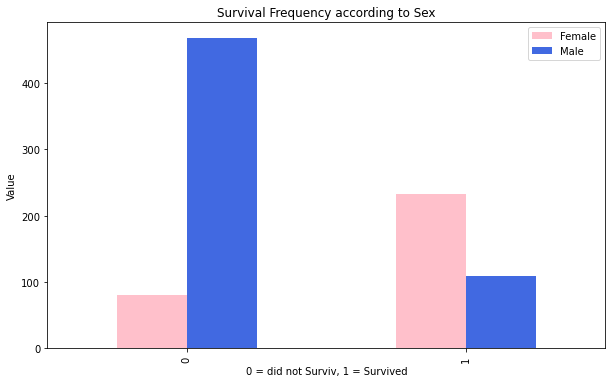

In [48]:
sex_surv.plot(kind='bar', figsize=(10,6), color=['pink','royalblue'])

plt.title('Survival Frequency according to Sex')
plt.xlabel('0 = did not Surviv, 1 = Survived')
plt.ylabel('Value')
plt.legend(['Female', 'Male']);

**Double survival for women!!**

In [3]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare',
       'Embarked'], dtype=object)

**Let's Compare Age and Fare with Survival.**

ValueError: `bins` must increase monotonically, when an array

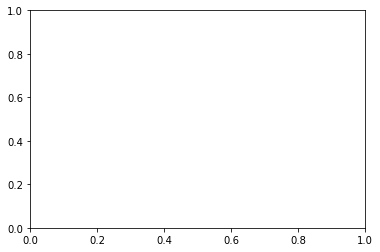

### Distibutions

In [4]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,1,22.0,7.2500,2
1,2,1,1,0,38.0,71.2833,0
2,3,1,3,0,26.0,7.9250,2
3,4,1,1,0,35.0,53.1000,2
4,5,0,3,1,35.0,8.0500,2


<AxesSubplot:ylabel='Frequency'>

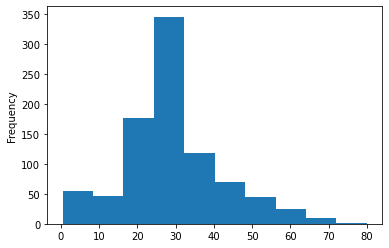

In [5]:
df.Age.plot.hist()

**Before us is an Extreme Value Type I Distribution for Age**


<AxesSubplot:ylabel='Frequency'>

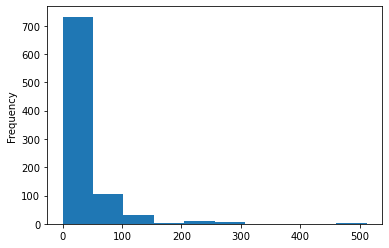

In [6]:
df.Fare.plot.hist()

**Here we have a case of Birnbaum-Saunders (Fatigue Life) Distribution**

## Correlation

In [7]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,0.012658,0.012985
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,0.257307,-0.176509
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,-0.549500,0.173511
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.182333,0.118492
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,0.091566,-0.039610
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,1.000000,-0.230365
Embarked,0.012985,-0.176509,0.173511,0.118492,-0.039610,-0.230365,1.000000


Right from the get go we recognise a **strong correlation** ,respectively, between each of **Sex**, **Fare** and **Pclass** and **Survival**

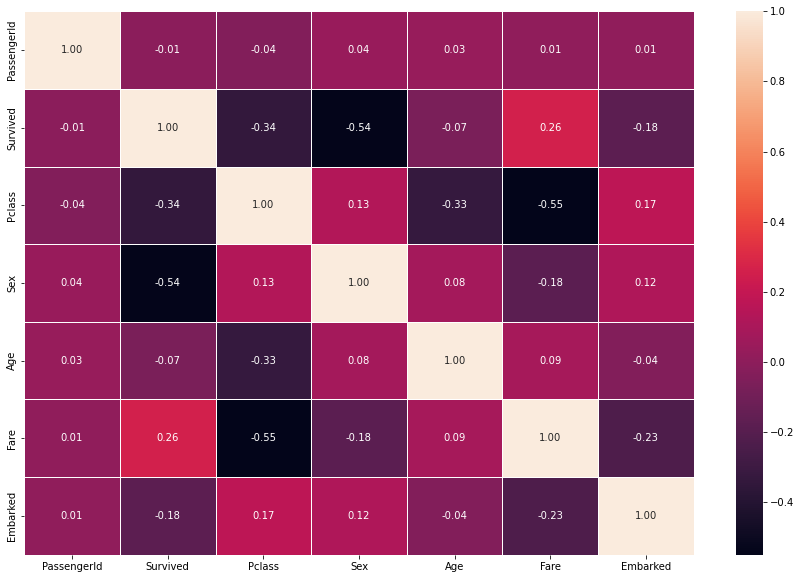

In [9]:
# Let's visualize this 

corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mat,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f")

# 5.Modelling

In [10]:
# Labels & Features
X = df.drop('Survived', axis=1)
y = df['Survived']

In [11]:
X

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,1,3,1,22.000000,7.2500,2
1,2,1,0,38.000000,71.2833,0
2,3,3,0,26.000000,7.9250,2
3,4,1,0,35.000000,53.1000,2
4,5,3,1,35.000000,8.0500,2
...,...,...,...,...,...,...
886,887,2,1,27.000000,13.0000,2
887,888,1,0,19.000000,30.0000,2
888,889,3,0,29.699118,23.4500,2
889,890,1,1,26.000000,30.0000,0


In [12]:
# Train & Test Sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [13]:
X_train

,PassengerId,Pclass,Sex,Age,Fare,Embarked
331,332,1,1,45.500000,28.5000,2
733,734,2,1,23.000000,13.0000,2
382,383,3,1,32.000000,7.9250,2
704,705,3,1,26.000000,7.8542,2
813,814,3,0,6.000000,31.2750,2
...,...,...,...,...,...,...
106,107,3,0,21.000000,7.6500,2
270,271,1,1,29.699118,31.0000,2
860,861,3,1,41.000000,14.1083,2
435,436,1,0,14.000000,120.0000,2


The current problem is **Classification** problem there for we must pick its appropriate Estimators.

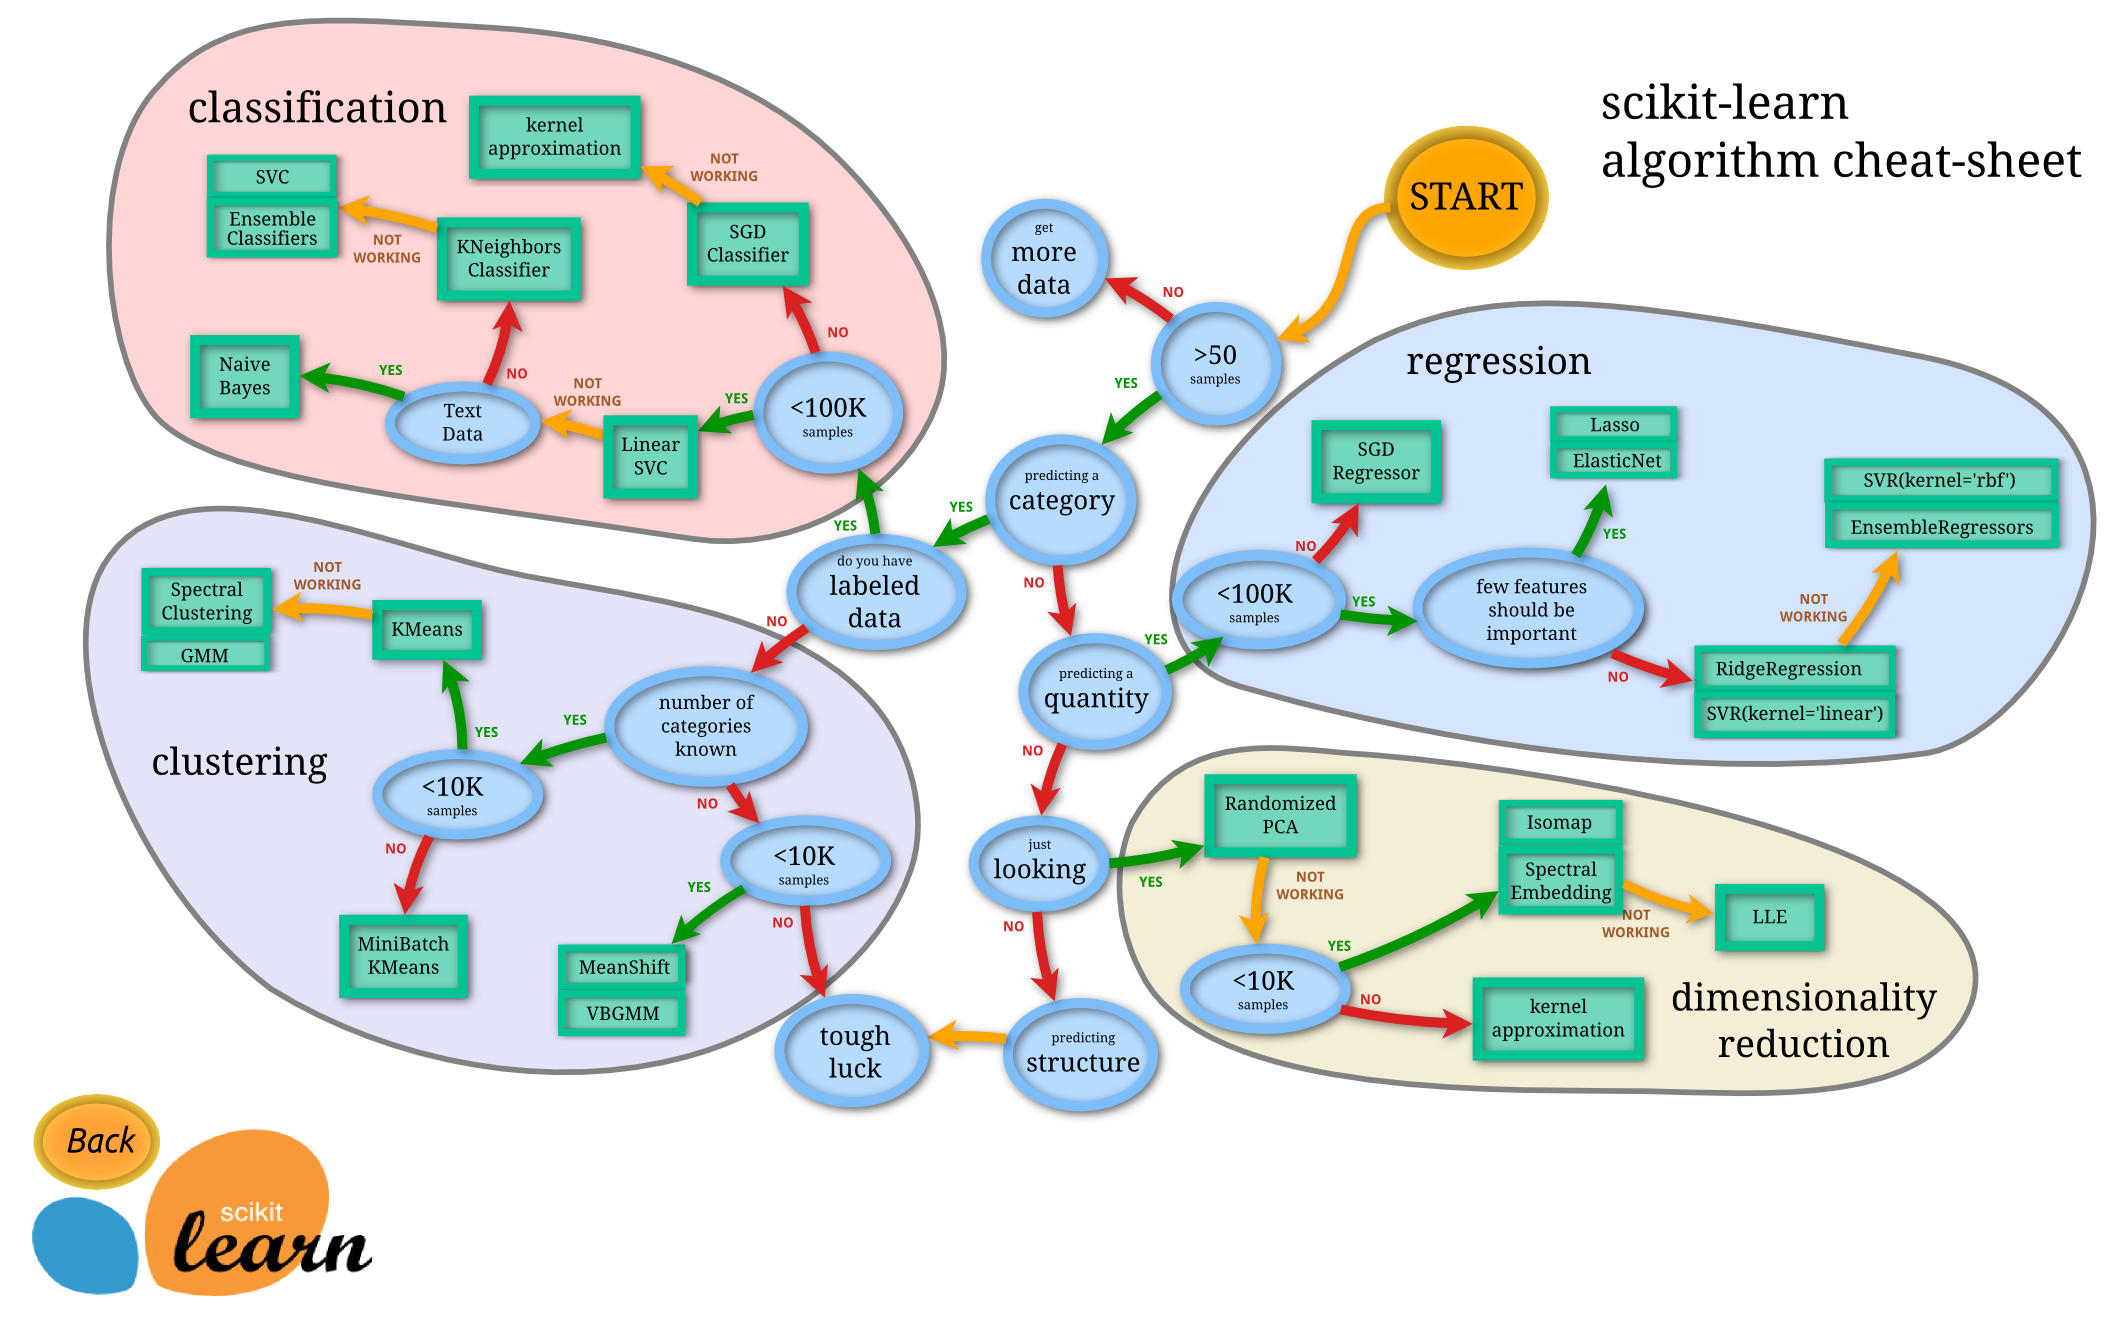

According to SKLearn's ML Map we pick **KNeighborClassifier**  
For the sake of convenience and as back up we shall also use **Logistic Regression** and **Ensemble Classifiers**(**RandomForrestClassifier**).

In [16]:
# Models Dictionnary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forrest': RandomForestClassifier()}

# Create a function to fit & score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    '''
    Fits and evaluates given ML Models.
    '''
    
    np.random.seed(42)
    #Dictionnary of models scores
    model_scores = {}
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate and append score to score dict
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [17]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

{'Logistic Regression': 0.7988826815642458,
 'KNN': 0.664804469273743,
 'Random Forrest': 0.8212290502793296}

Next is:
- Hyperparameter Tuning
- Feature Importance
- Confusion Matrix
- Cross Validation
- Pricision
- Recall
- F1 score
- Classification report
- ROC Curve
- Area under the curve AUC

## Hyperparameter Tuninng With RandomizedSarchCV

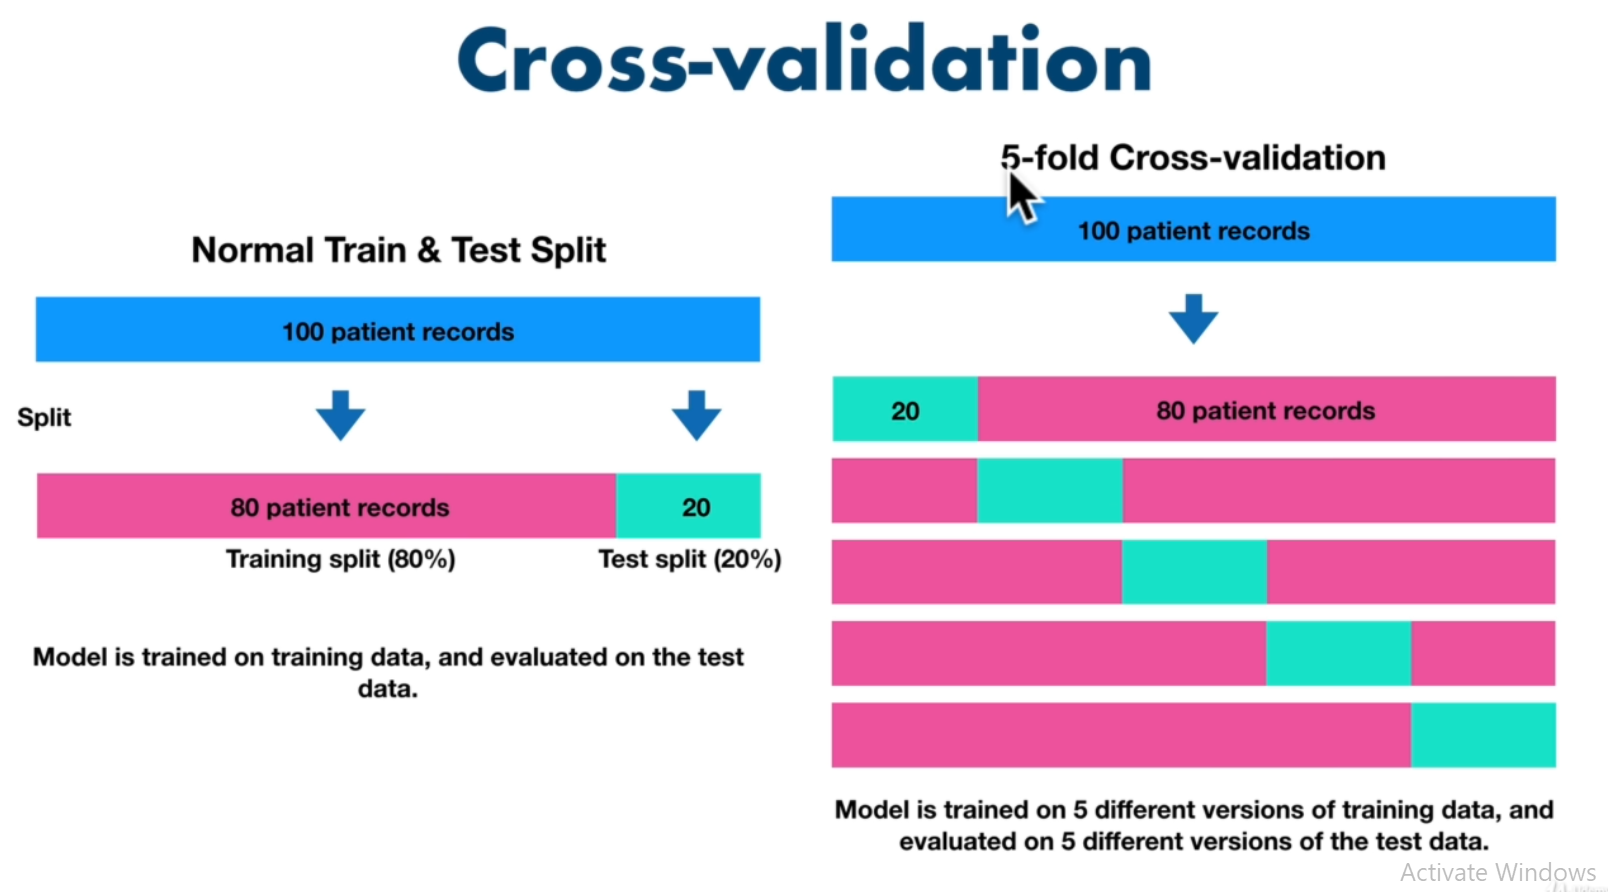

### Tunning RandomForrestClassifier and Logistic Regression

In [23]:
# Creating Hyperparameter Grids

log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5,10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [19]:
# Tuning Log Reg
np.random.seed(42)

# Setup random hyperparameter search for Log Reg
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# Fit random hyperparameter search model for LR
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [20]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [21]:
rs_log_reg.score(X_test, y_test)

0.7821229050279329

In [24]:
# Tuning RFC
np.random.seed(42)

# Setup random hyperparameter search for RFC
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# Fit random hyperparameter search model for LR
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [25]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [27]:
rs_rf.score(X_test, y_test)

0.8212290502793296

## Hyperparameter Tuning with GridSearchCV

In [28]:
log_reg_grid = {'C': np.logspace(-4, 4, 30), 'solver': ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(), param_grid = log_reg_grid, cv = 5, verbose=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [29]:
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [30]:
gs_log_reg.score(X_test, y_test)

0.7988826815642458

In [31]:
model_scores

{'Logistic Regression': 0.7988826815642458,
 'KNN': 0.664804469273743,
 'Random Forrest': 0.8212290502793296}

###### Even after Tuning RFC is still the best model

### Predicitons with RFC

In [32]:
clf = RandomForestClassifier(max_depth=None, n_estimators = 510, min_samples_split=14, min_samples_leaf=1)

In [33]:
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=14, n_estimators=510)

In [35]:
y_preds = rs_rf.predict(X_test)
y_preds

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [39]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

## Evaluation

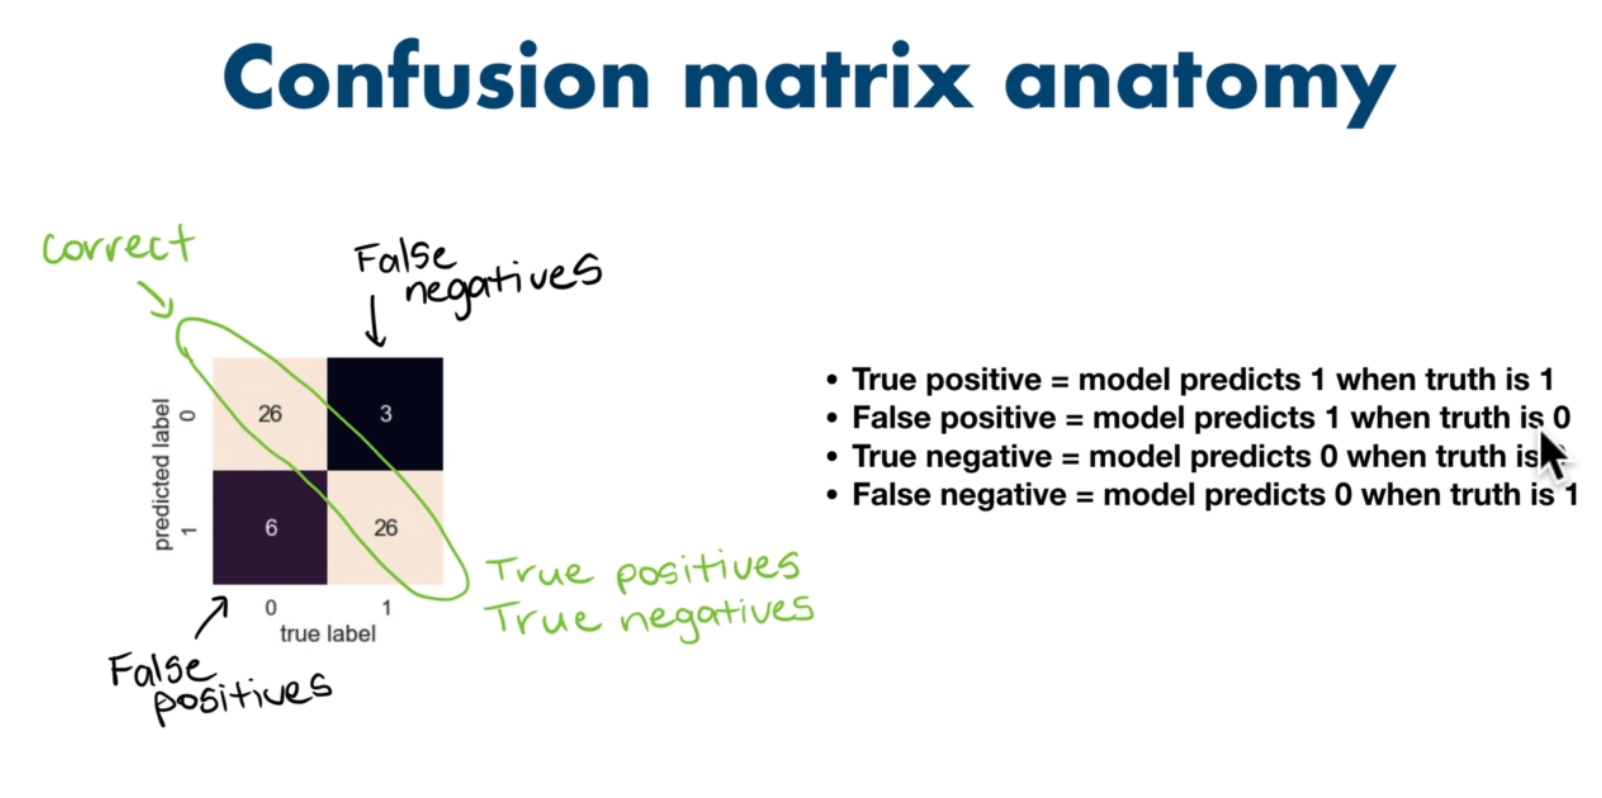

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


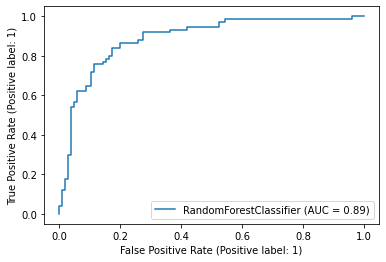

In [37]:
# Roc Curve
plot_roc_curve(clf, X_test, y_test)

In [38]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[93 12]
 [20 54]]


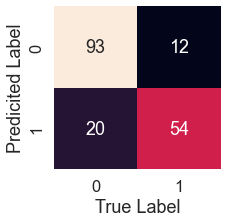

In [42]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicited Label')
    
plot_conf_mat(y_test, y_preds)

In [43]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Meh Fuck dakchi lib9a 3gzt!